In [ ]:
pip install retina-face &> /dev/null

In [ ]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from retinaface import RetinaFace
import matplotlib.image as mpimg
import timeit

# Sets the size of figures
plt.rcParams['figure.figsize'] = [10, 8]

# download_image function
def download_image(name, url):
  """
  Downloads an image from the 'url' provided and saves it in the current
  working directory with 'name'. The image file's extension is obtained directly
  from the 'url' provided.

  Inputs:
    1. name - name of image file (without the extension e.g. "test_image")
    2. url  - url of the image file

  Output:
    1. name - name of the image file with the extension (e.g. "test_image.png")
  
  Example call:
    name = download_image("test_image", "url-to-my-test-image-download.png")

    print(name) would return "test_image.png" in this case

  """
  name = name + "." + url.split('.')[-1]
  response = requests.get(url)
  file = open(name, "wb")
  file.write(response.content)
  file.close()

  return name


# process_ouput function
def process_ouput(resp):
  """
  Extracts the region of interest (roi) for each detected face in 'resp'.

  Input:
    1. resp - response of the RetinaFace detector

  Output:
    1. rois - list of rois (1 roi per face). A roi (e.g. rois[0]) is a 4
       element long list containing the top-left (tl) and bottom-right (br)
       points' coordinates (e.g. [tl_x, tl_y, br_x, br_y])

  Example call:
    rois = process_ouput(resp)
  
  """
  # Obtains the face names and output keys
  face_names  = [face for face in resp.keys()]
  output_keys = [key for key in resp[face_names[0]].keys()]
  farea       = output_keys[1] # facial area

  rois = []
  for face in face_names:
    #roi = np.array(resp[face][farea])
    rois.append(resp[face][farea])
  
  return rois


# detect_faces function
def detect_faces(name, url):
  """
  Detects faces in a image specified by the 'url' with 'name'. The image is
  first downloaded from 'url' and save in the current working directory with
  'name' + extension. The extension is obtained from the 'url'.

  RetinaFace then detects faces in the image. Each face is plotted with a red
  rectangle overlaid on the original image.

  Inputs:
    1. name - name of image file (without the extension e.g. "test_image")
    2. url  - url of the image file

  Output:
    1. fig - handle to the plotted figure
    2. ax  - handle to axes of the plotted figure
  """
  # Downloads the image from the URL provided
  name = download_image(name, url)

  # Detects faces using RetinaFace
  resp = RetinaFace.detect_faces(name)

  # Obtains the face region of interest
  rois = process_ouput(resp)

  # Create plot
  fig, ax = plt.subplots()      # create figure and axes
  ax.imshow(mpimg.imread(name)) # display the image

  # Create a Rectangle patch for each region of interest and adds to the axes
  for roi in rois:
    rect = patches.Rectangle(tuple(roi[:2]), roi[2] - roi[0], roi[3] - roi[1],
                            linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

  plt.title(name, fontsize=18)
  plt.show()

  return fig, ax


# test_inference_time function
def test_inference_time(name, repeats, verbose=0):
  """
  Tests the inference time of RetinaFace evaluating image 'name'. Repeats the
  test 'repeat' times. Outputs the minimum, average and maximum values as a
  dictionary. Also prints them if verbose=1 (default:0).

  Inputs:
    1. name - image name with extension (e.g. "test_image.png")
    2. repeats - number of times to repeat (and time) the inference step
    3. verbose - controls verbosity level ([0 = quiet], 1 = verbose)

  Output:
    1. times - dictionary containing the minimum, average and maximum times
       (in seconds). Keys: "tmin", "tavg", "tmax".

  Example call:
    times = test_inference_time("test_image.png", 5, verbose=1)

  """
  # Times the inference step 'repeats' times
  t = []
  for i in range(repeats):
    t.append(timeit.timeit('RetinaFace.detect_faces({})'.format(name),
                           setup='from retinaface import RetinaFace', number=1))
  
  # Calculates the minimum, average and maximum times
  tmin = np.amin(t)
  tavg = np.mean(t)
  tmax = np.amax(t)
  
  # Prints the results if verbosity=1
  if verbose:
    print("Min:{:.3f} s / Avg:{:.3f} s / Max:{:.3f} s | [{} repeats]".format(tmin, tavg, tmax, repeats))

  # Returns the appropriate output
  return {"tmin":tmin, "tavg":tavg, "tmax":tmax}


# Download sample image
First, we download a sample image to run the face detector on.

In [ ]:
NAME = "rihanna_1"
URL  = "https://upload.wikimedia.org/wikipedia/commons/c/c2/Rihanna_Fenty_2018.png"

# Downloads the image from the URL provided
name = download_image(NAME, URL)

# Run face detector (RetinaFace)

Runs the RetinaFace deep neural network face detector on the image to identify all faces.

In [ ]:
import timeit

name = "test1.jpg"

# Detects faces using RetinaFace
resp = RetinaFace.detect_faces(name)

# Investigating time
REPEATS = 5
t = []
for i in range(REPEATS):
  t.append(timeit.timeit('RetinaFace.detect_faces("test1.jpg")', setup='from retinaface import RetinaFace', number=1))

print("Min:{:.3f} s / Avg:{:.3f} s / Max:{:.3f} s | [{} repeats]".format(np.amin(t), np.mean(t), np.amax(t), REPEATS))

Min:0.595 s / Avg:0.837 s / Max:1.398 s | [5 repeats]


# Process and plot results



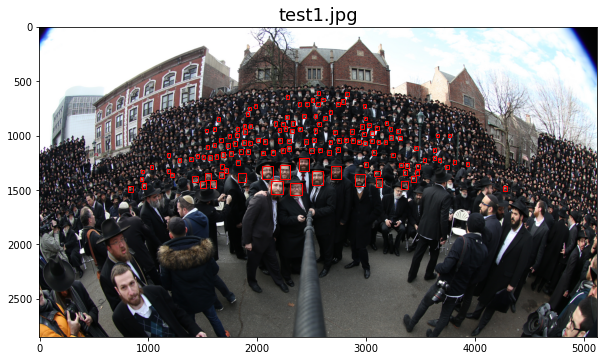

In [ ]:
# Obtains the face(s) region(s) of interest
rois = process_ouput(resp)

# Creates plot
fig, ax = plt.subplots()      # create figure and axes
ax.imshow(mpimg.imread(name)) # display the image

# Creates a Rectangle patch for each region of interest and adds to the axes
for roi in rois:
  rect = patches.Rectangle(tuple(roi[:2]), roi[2] - roi[0], roi[3] - roi[1],
                            linewidth=1, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

# Adds title and plots the result
plt.title(name, fontsize=18)
plt.show()

# Demo Time!

Pick any picture in the internet and try the face detector out!

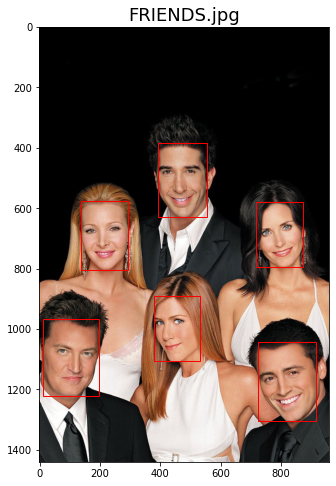

In [ ]:
detect_faces("FRIENDS", "https://flxt.tmsimg.com/assets/p183931_i_v8_ag.jpg")

# Checking inference speeds

Checks the inference speed of RetinaFace by repeating the face detection over the same image X times.

In [ ]:
# Tests the inference speed of RetinaFace by repeating face detection 'REPEAT'
# times
REPEATS = 5
times   = test_inference_time(name, REPEATS, verbose=1)

# Old stuff (no peaking!)

Hey! You should not be looking around in here .\\/.

In [ ]:
# Downloads random images from the internet for the demo.

image_names = ["rihanna_1.png", "beatles_1.jpg", "friends_1.jpg"]
urls = ["https://upload.wikimedia.org/wikipedia/commons/c/c2/Rihanna_Fenty_2018.png", 
        "https://www.rollingstone.com/wp-content/uploads/2010/12/BeatlesMainW.jpg",
        "https://cdn.vox-cdn.com/thumbor/efu91kS78mcTCubor0dABE1kKPI=/1400x1050/filters:format(jpeg)/cdn.vox-cdn.com/uploads/chorus_asset/file/2357468/1-friends.0.jpg"]

gallery = ["rihanna_g.jpg"]
gurls   = ["https://media.vogue.co.uk/photos/60a380f206641a771ba6e4f7/2:3/w_2560%2Cc_limit/SPL5227552_020.jpg"]


import requests

for i, url in enumerate(urls):
  response = requests.get(url)
  file = open(image_names[i], "wb")
  file.write(response.content)
  file.close()

for i, url in enumerate(gurls):
  response = requests.get(url)
  file = open(gallery[i], "wb")
  file.write(response.content)
  file.close()

%ls

beatles_1.jpg  rihanna_1.png  rihanna_g.jpg
friends_1.jpg  rihanna_g      sample_data/



****************************************************************************************************



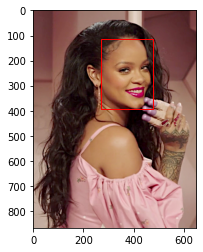

In [ ]:
from retinaface import RetinaFace
import matplotlib.patches as patches
import numpy as np

# Detects faces using RetinaFace
resp = RetinaFace.detect_faces(image_names[0])
print("\n" + "*" * 100 + "\n")
resp              # shows response

# Obtains the face region of interest
rois = process_ouput(resp)

# Create plot
fig, ax = plt.subplots()                # Create figure and axes
ax.imshow(mpimg.imread(image_names[0])) # Display the image

# Create a Rectangle patch for each region of interest and adds to the axes
for roi in rois:
  rect = patches.Rectangle(tuple(roi[:2]), roi[2] - roi[0], roi[3] - roi[1],
                           linewidth=1, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

plt.show()

Original faces:


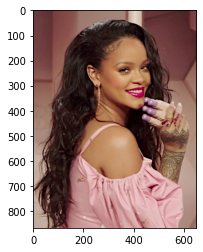

Unaligned faces:


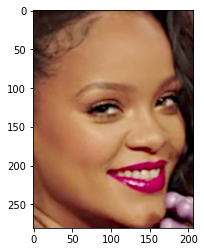

Aligned faces:


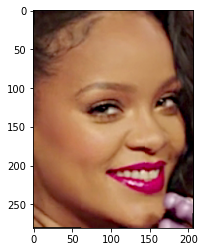

In [ ]:
#<markdown>
# Alignment

#A modern face recognition pipeline consists of 4 common stages: detect, align, represent and verify. Experiments show that alignment increases the face recognition accuracy almost 1%. Here, retinaface can find the facial landmarks including eye coordinates. In this way, it can apply alignment to detected faces with its extract faces function.
#<\markdown>

import matplotlib.pyplot as plt
import matplotlib.image  as mpimg


face_aligned   = RetinaFace.extract_faces(img_path = image_names[0], align = True)
face_unaligned = RetinaFace.extract_faces(img_path = image_names[0], align = False)

print("Original faces:")
plt.imshow(mpimg.imread(image_names[0]))
plt.show()

print("Unaligned faces:")
for face in face_unaligned:
  plt.imshow(face)
  plt.show()

print("Aligned faces:")
for face in face_aligned:
  plt.imshow(face)
  plt.show()




In [ ]:
#<markdown>

# Face Recognition

#Note:
#  1. Face detection is done by RetinaFace as said before.
#  2. Face *recognition* is done by ArcFace (from insightface project).

#ArcFace and RetinaFace pair is wrapped in deepface framework. Deepface is, that way, an end-to-end face recognition pipeline.
#<\markdown>

pip install deepface

     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 2.3 MB 58.1 MB/s 


In [ ]:
from deepface import DeepFace
obj = DeepFace.verify(image_names[0], gallery[0], model_name = "ArcFace", detector_backend = "retinaface")
print(obj["verified"])
obj

True


{'distance': 0.5684977557654207,
 'max_threshold_to_verify': 0.68,
 'model': 'ArcFace',
 'similarity_metric': 'cosine',
 'verified': True}

In [ ]:
%ls

beatles_1jpg   friends_1.jpg  rihanna_1png   rihanna_g      sample_data/
beatles_1.jpg  FRIENDS.jpg    rihanna_1.png  rihanna_g.jpg  test_image.png
